In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
train_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\train_data\\train.csv"
df_train = pd.read_csv(train_data_path)

In [97]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test = pd.read_csv(test_data_path)

# EDA

In [4]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95


In [5]:
df_train.shape

(210240, 16)

In [6]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [60]:
df_train.dtypes

Timestamp              object
Temperature           float64
Dew Point             float64
Surface Albedo        float64
Pressure                int64
Wind Direction          int64
Wind Speed            float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Fill Flag               int64
Ozone                 float64
Cloud Type              int64
Solar Zenith Angle    float64
Precipitable Water    float64
Relative Humidity     float64
dtype: object

Cloud Type


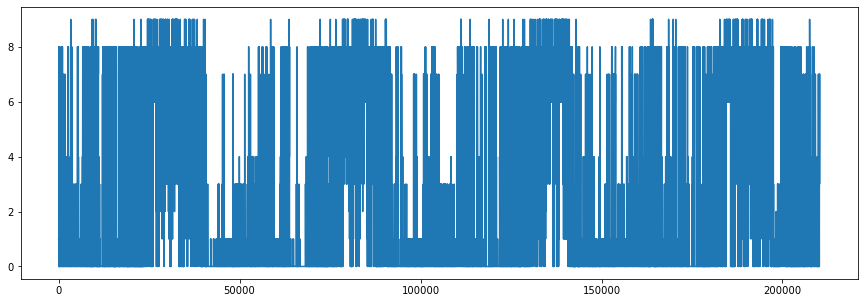

Dew Point


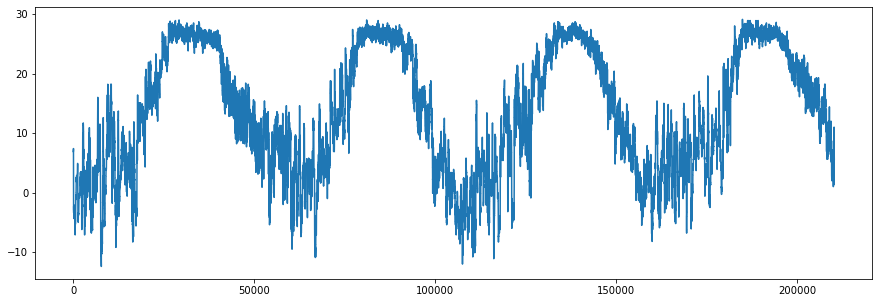

Temperature


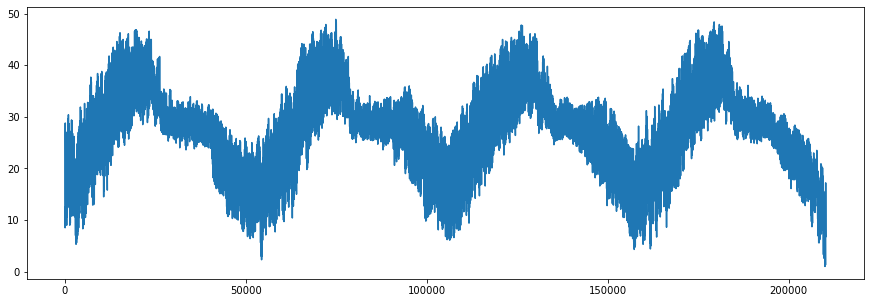

Pressure


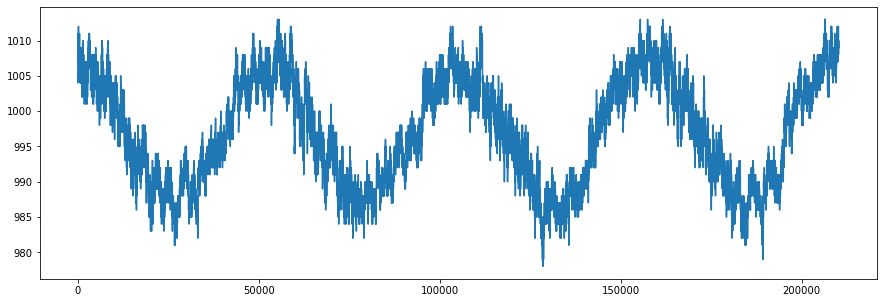

Relative Humidity


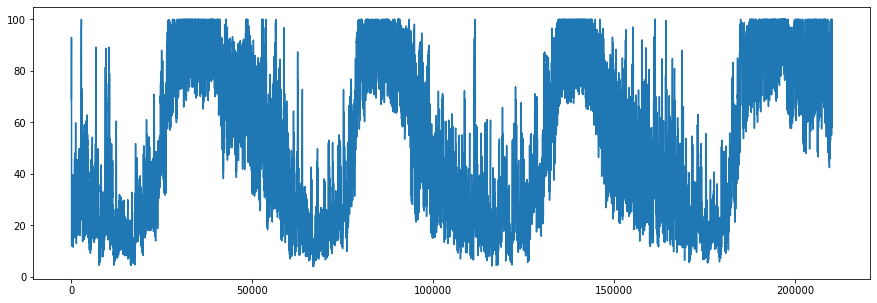

Ozone


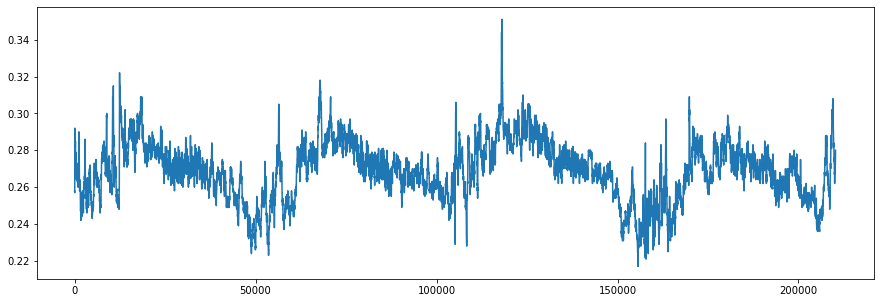

Solar Zenith Angle


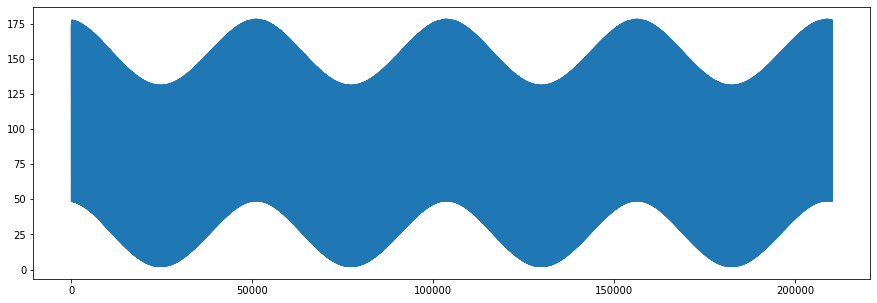

Surface Albedo


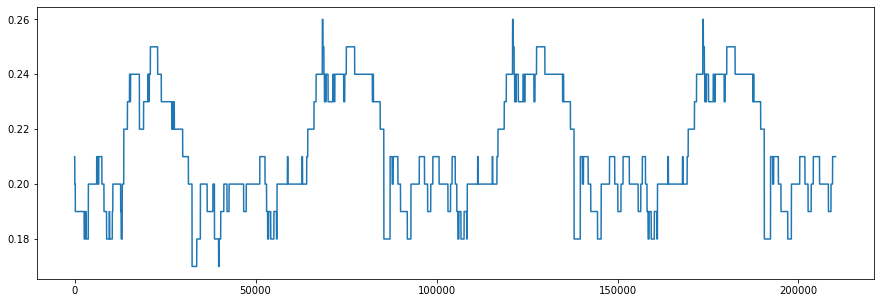

Precipitable Water


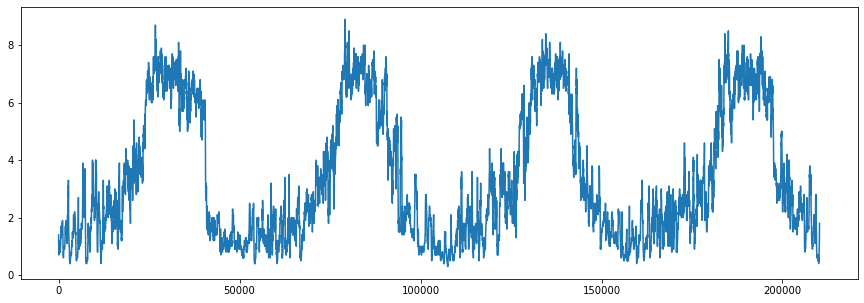

Wind Direction


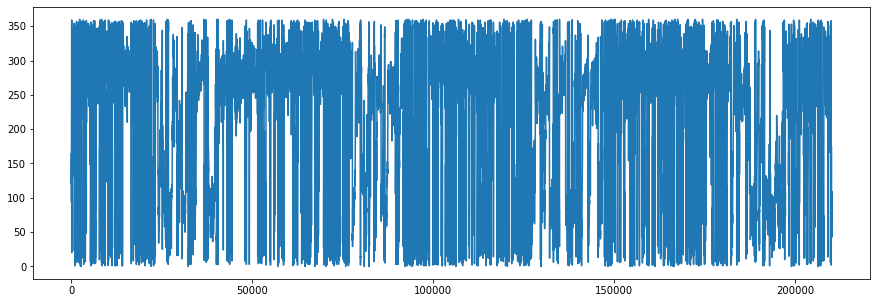

Wind Speed


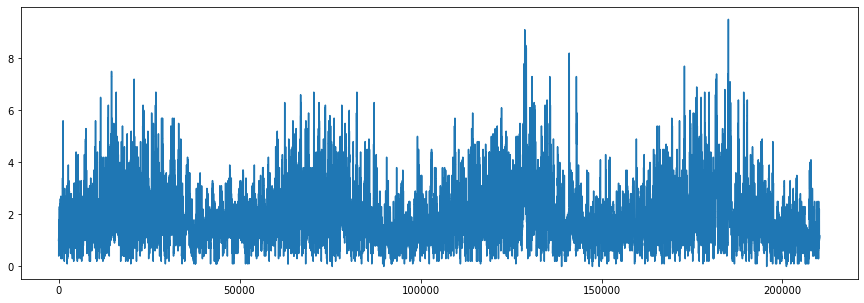

Fill Flag


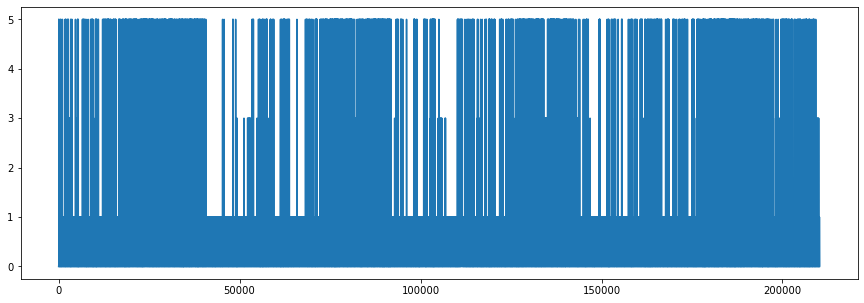

In [57]:
feature_cols = ['Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Ozone','Solar Zenith Angle','Surface Albedo','Precipitable Water','Wind Direction','Wind Speed','Fill Flag']

for col in feature_cols:
    print(col)
    plt.figure(figsize=(15, 5))
    df_train[col].plot()
    plt.show()

# Heatmap Analysis

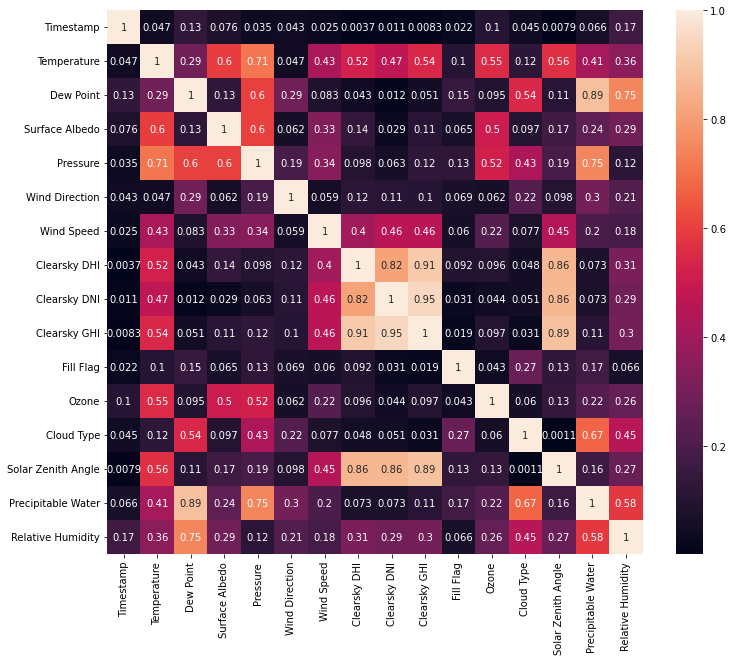

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr().abs(), annot=True)
plt.show()

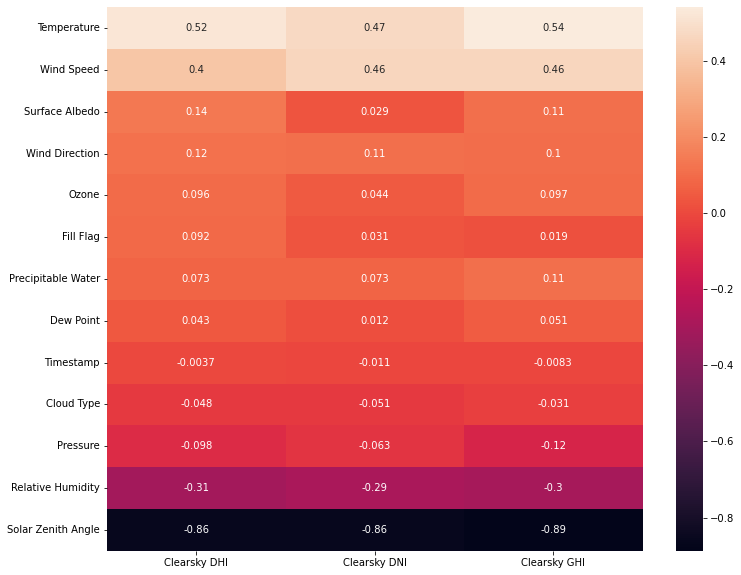

In [59]:
target_cols = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr()[target_cols].drop(target_cols).sort_values(target_cols, ascending=False), annot=True)
plt.show()

# Calculating GHI

In [113]:
df_train['GHI_cal'] = df_train['Clearsky DNI']*np.cos(np.radians(df_train['Solar Zenith Angle'])) + df_train['Clearsky DHI']

In [73]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82,0.0
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73,0.0
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65,0.0
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11,0.0
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,4,173.77,1.8,92.63,0.0
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,0,0.279,7,175.77,1.8,93.26,0.0
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.31,1.8,93.26,0.0
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,0,0.279,7,177.36,1.8,91.95,0.0


# Heatmap with GHI 

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

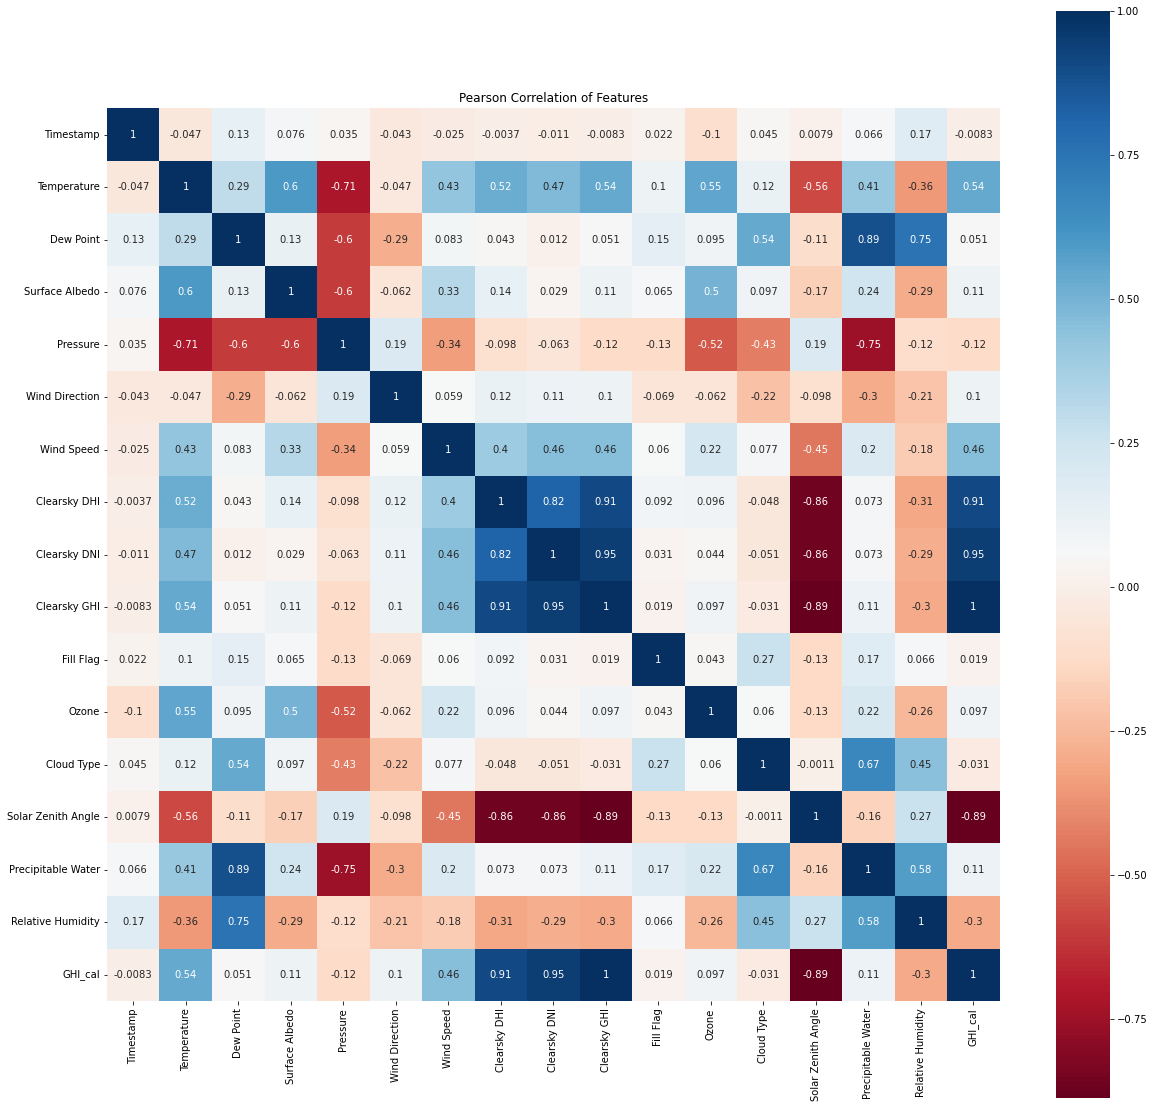

In [62]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.corr(), square=True, cmap=colormap, annot=True)

GHI, DNI, DHI have high correlation with Solar Zenith Angle.<br>
Moderate Correlation Temperature & Wind Speed.<br>
Temperature has high correlation with pressure & surface albedo and moderate correlaton with Precipitable Water.<br>
Precipitable Water has High correlation with Dew Point & Pressure and moderately correlated with relative humidity, cloud type.

# GHI and TIME plot

In [63]:
from matplotlib import dates as mpl_dates

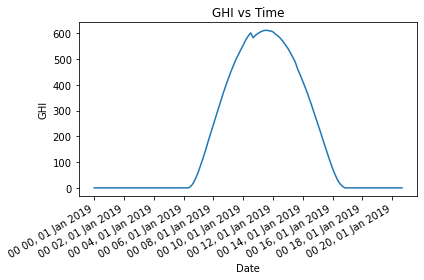

In [67]:
plt.plot(df_train['Timestamp'][0:125], df_train['Clearsky GHI'][0:125])
plt.title('GHI vs Time')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%M %H, %d %b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()

In [20]:
df_train.describe()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,GHI_cal
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,26.795495,13.447805,0.211623,996.856141,209.095453,1.918037,96.720681,225.098992,249.938537,0.288699,0.268813,2.513604,89.745758,3.377582,53.364443,249.938980
std,8.639162,10.234861,0.020889,7.226820,101.616108,1.194954,120.334380,277.920322,325.049751,1.052178,0.015632,3.093565,42.852632,2.261960,29.692608,325.049633
min,1.000000,-12.400000,0.170000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217000,0.000000,2.210000,0.300000,4.100000,0.000000
25%,20.800000,4.900000,0.200000,990.000000,109.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.259000,0.000000,53.140000,1.500000,25.540000,0.000000
50%,27.300000,13.100000,0.200000,997.000000,248.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.270000,1.000000,89.400000,2.500000,51.210000,0.000000
75%,32.200000,24.400000,0.230000,1003.000000,293.000000,2.500000,194.000000,486.000000,533.000000,0.000000,0.279000,6.000000,126.440000,5.700000,80.820000,533.435489
max,48.900000,29.100000,0.260000,1013.000000,360.000000,9.500000,603.000000,1008.000000,1053.000000,5.000000,0.351000,9.000000,177.950000,8.900000,100.000000,1054.021274


In [98]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], format='%Y-%m-%d %H:%M:%S')

# Extracting values from Timestamp

In [99]:
df_train["DAY"] = pd.to_datetime(df_train["Timestamp"]).dt.day_name()
df_train["MONTH"] = pd.to_datetime(df_train["Timestamp"]).dt.month
df_train["WEEK"] = pd.to_datetime(df_train["Timestamp"]).dt.week

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_11140\1471123476.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train["WEEK"] = pd.to_datetime(df_train["Timestamp"]).dt.week


In [100]:
from sklearn import preprocessing
  
# label_encoder object knows 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'day'.
df_train['DAY']= label_encoder.fit_transform(df_train['DAY'])
  
df_train['DAY'].unique()

array([5, 6, 4, 0, 2, 3, 1])

In [101]:
df_train["DATE"] = pd.to_datetime(df_train["Timestamp"]).dt.date
df_train["TIME"] = pd.to_datetime(df_train["Timestamp"]).dt.time

In [82]:
# import datetime as dt
# df_train['Date'] = [dt.date() for d in df_train['Timestamp']]
# df_train['Time'] = [dt.time() for d in df_train['Timestamp']]

In [102]:
# add hours and minutes for ml models
df_train["HOURS"] = pd.to_datetime(df_train["TIME"], format='%H:%M:%S').dt.hour
df_train["MINUTES"] = pd.to_datetime(df_train["TIME"], format='%H:%M:%S').dt.minute

In [105]:
df_train["YEAR"] = pd.to_datetime(df_train["Timestamp"]).dt.year

In [109]:
# Encode labels in column 'day'.
df_train['YEAR']= label_encoder.fit_transform(df_train['YEAR'])
df_train['YEAR'].unique()

array([0, 1, 2, 3], dtype=int64)

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           210240 non-null  datetime64[ns]
 1   Temperature         210240 non-null  float64       
 2   Dew Point           210240 non-null  float64       
 3   Surface Albedo      210240 non-null  float64       
 4   Pressure            210240 non-null  int64         
 5   Wind Direction      210240 non-null  int64         
 6   Wind Speed          210240 non-null  float64       
 7   Clearsky DHI        210240 non-null  int64         
 8   Clearsky DNI        210240 non-null  int64         
 9   Clearsky GHI        210240 non-null  int64         
 10  Fill Flag           210240 non-null  int64         
 11  Ozone               210240 non-null  float64       
 12  Cloud Type          210240 non-null  int64         
 13  Solar Zenith Angle  210240 no

In [115]:
df_train

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Relative Humidity,DAY,MONTH,WEEK,DATE,TIME,HOURS,MINUTES,YEAR,GHI_cal
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,...,68.82,5,1,1,2019-01-01,00:00:00,0,0,0,0.0
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,...,69.73,5,1,1,2019-01-01,00:10:00,0,10,0,0.0
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,...,70.65,5,1,1,2019-01-01,00:20:00,0,20,0,0.0
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,...,71.11,5,1,1,2019-01-01,00:30:00,0,30,0,0.0
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,...,71.91,5,1,1,2019-01-01,00:40:00,0,40,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2022-12-31 23:10:00,6.9,5.8,0.21,1009,54,1.2,0,0,0,...,92.63,2,12,52,2022-12-31,23:10:00,23,10,3,0.0
210236,2022-12-31 23:20:00,6.8,5.8,0.21,1009,54,1.2,0,0,0,...,93.26,2,12,52,2022-12-31,23:20:00,23,20,3,0.0
210237,2022-12-31 23:30:00,6.8,5.8,0.21,1009,55,1.1,0,0,0,...,93.26,2,12,52,2022-12-31,23:30:00,23,30,3,0.0
210238,2022-12-31 23:40:00,6.8,5.6,0.21,1009,55,1.1,0,0,0,...,91.95,2,12,52,2022-12-31,23:40:00,23,40,3,0.0


In [116]:
df_train.drop(columns = ['Fill Flag', 'GHI_cal', 'Timestamp','TIME','DATE'], inplace=True)

In [117]:
df_train

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,DAY,MONTH,WEEK,HOURS,MINUTES,YEAR
0,12.5,6.9,0.21,1005,121,1.0,0,0,0,0.258,1,173.92,1.4,68.82,5,1,1,0,0,0
1,12.3,6.9,0.21,1005,122,1.0,0,0,0,0.258,1,171.79,1.3,69.73,5,1,1,0,10,0
2,12.1,6.9,0.21,1005,124,1.0,0,0,0,0.258,1,169.59,1.3,70.65,5,1,1,0,20,0
3,12.0,6.9,0.21,1005,125,1.0,0,0,0,0.258,1,167.37,1.3,71.11,5,1,1,0,30,0
4,11.8,6.9,0.21,1005,126,1.0,0,0,0,0.258,1,165.13,1.3,71.91,5,1,1,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,6.9,5.8,0.21,1009,54,1.2,0,0,0,0.279,4,173.77,1.8,92.63,2,12,52,23,10,3
210236,6.8,5.8,0.21,1009,54,1.2,0,0,0,0.279,7,175.77,1.8,93.26,2,12,52,23,20,3
210237,6.8,5.8,0.21,1009,55,1.1,0,0,0,0.279,7,177.31,1.8,93.26,2,12,52,23,30,3
210238,6.8,5.6,0.21,1009,55,1.1,0,0,0,0.279,7,177.36,1.8,91.95,2,12,52,23,40,3


# Heatmap analysis

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

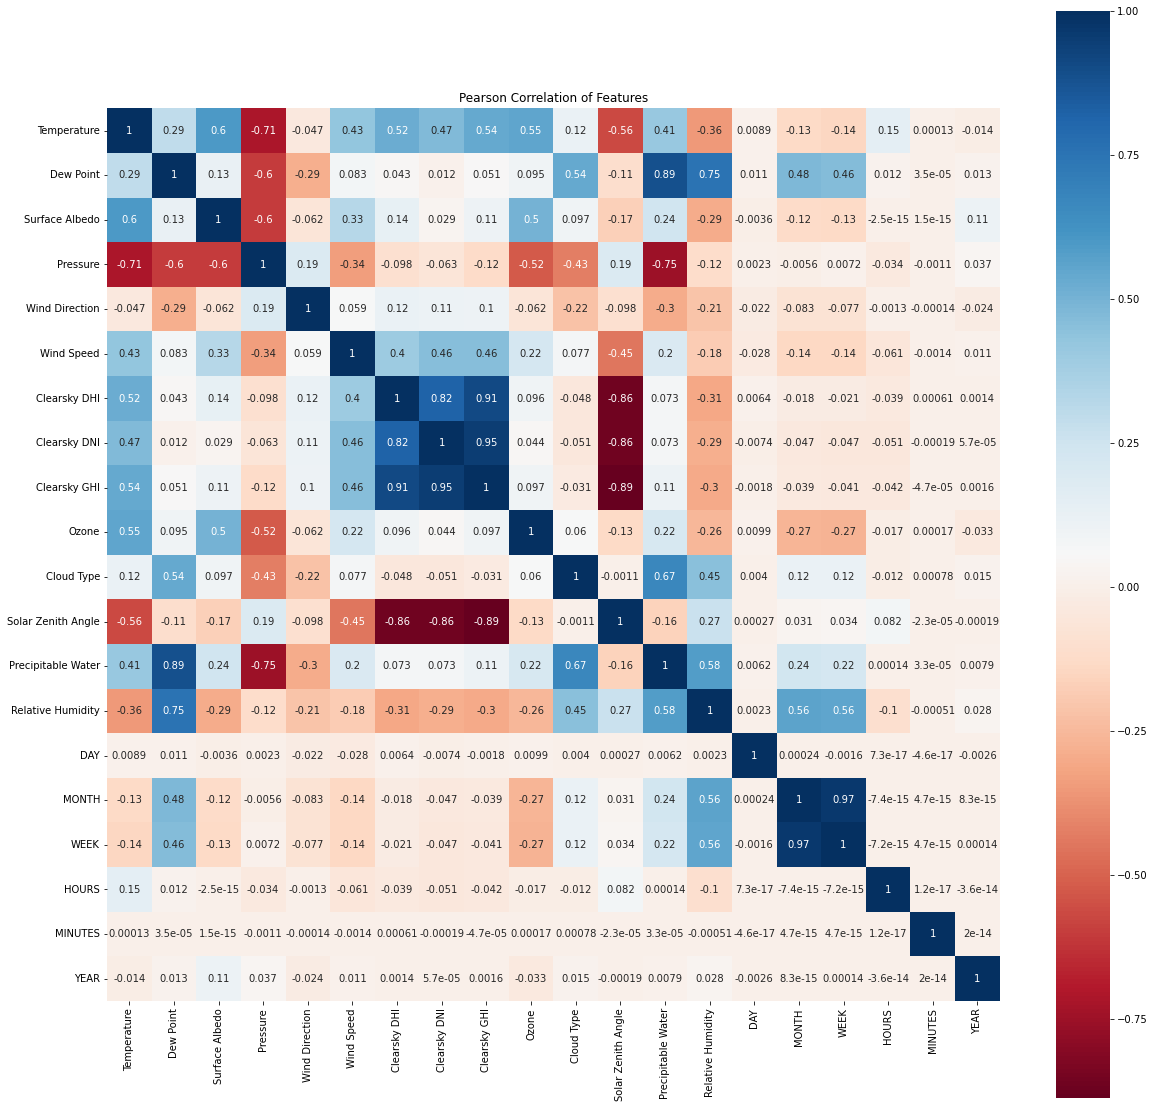

In [118]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features')
sns.heatmap(df_train.corr(), square=True, cmap=colormap, annot=True)

In [158]:
df_train.shape

(210240, 20)

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Temperature         210240 non-null  float64
 1   Dew Point           210240 non-null  float64
 2   Surface Albedo      210240 non-null  float64
 3   Pressure            210240 non-null  int64  
 4   Wind Direction      210240 non-null  int64  
 5   Wind Speed          210240 non-null  float64
 6   Clearsky DHI        210240 non-null  int64  
 7   Clearsky DNI        210240 non-null  int64  
 8   Clearsky GHI        210240 non-null  int64  
 9   Ozone               210240 non-null  float64
 10  Cloud Type          210240 non-null  int64  
 11  Solar Zenith Angle  210240 non-null  float64
 12  Precipitable Water  210240 non-null  float64
 13  Relative Humidity   210240 non-null  float64
 14  DAY                 210240 non-null  int32  
 15  MONTH               210240 non-nul

# Model Selection

In [120]:
from xgboost import XGBRegressor

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [122]:
X = df_train.drop(columns=['Clearsky GHI'])
y = df_train['Clearsky GHI']

In [123]:
X1 = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y1 = df_train['Clearsky GHI']

X2 = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y2 = df_train['Clearsky DHI']

X3 = df_train.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
y3 = df_train['Clearsky DNI']

# Train-validation split

In [124]:
x1_train, x1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.10, random_state=101)

x2_train, x2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.10, random_state=101)

x3_train, x3_valid, y3_train, y3_valid = train_test_split(X3, y3, test_size=0.10, random_state=101)

# Model fitting

In [125]:
model1 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model1.fit(x1_train, y1_train)#GHI

model2 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model2.fit(x2_train, y2_train)#DHI

model3 = XGBRegressor(learning_rate = 0.4, max_depth = 9, n_estimators = 1000, reg_alpha = 0)
model3.fit(x3_train, y3_train)#DNI

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Predction and evaluation

In [146]:
train_pred1 = model1.predict(x1_train)
valid_pred1 = model1.predict(x1_valid)

In [127]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [147]:
print('Clearsky GHI')
print(f"Train score = {model1.score(x1_train, y1_train)}\tTrain MSE = {mean_squared_error(train1_pred, y1_train)}")
print(f"Validation score = {model1.score(x1_valid, y1_valid)}\tValidation MSE = {mean_squared_error(valid1_pred, y1_valid)}")

Clearsky GHI
Train score = 0.9999987491497198	Train MSE = 0.13216762497854825
Validation score = 0.9998256770364767	Validation MSE = 18.409877324993758


In [142]:
print(model1.score(x1_train, y1_train),r2_score(y1_train,train_pred))

0.9999987491497198 0.9999987491497198


In [150]:
rmse1 = np.sqrt(MSE(train_pred,y1_train))

In [151]:
rmse1

0.36354865558622035

In [152]:
train2_pred = model2.predict(x2_train)
valid2_pred = model2.predict(x2_valid)

In [153]:
print('Clearsky DHI')
print(f"Train score = {model2.score(x2_train, y2_train)}\tTrain MSE = {mean_squared_error(train2_pred, y2_train)}")
print(f"Validation score = {model2.score(x2_valid, y2_valid)}\tValidation MSE = {mean_squared_error(valid2_pred, y2_valid)}")

Clearsky DHI
Train score = 0.9999777656535319	Train MSE = 0.32209105784283143
Validation score = 0.9963266238819665	Validation MSE = 52.99630787279874


In [155]:
train3_pred = model3.predict(x3_train)
valid3_pred = model3.predict(x3_valid)

In [156]:
print('Clearsky DNI')
print(f"Train score = {model3.score(x3_train, y3_train)}\tTrain MSE = {mean_squared_error(train3_pred, y3_train)}")
print(f"Validation score = {model3.score(x3_valid, y3_valid)}\tValidation MSE = {mean_squared_error(valid3_pred, y3_valid)}")

Clearsky DNI
Train score = 0.9999696118128034	Train MSE = 2.3462089450513046
Validation score = 0.9964933589280701	Validation MSE = 271.83921762782353


# Test Set 

In [161]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test = pd.read_csv(test_data_path)

In [172]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [173]:
df_test["DAY"] = pd.to_datetime(df_test["Timestamp"]).dt.day_name()
df_test["MONTH"] = pd.to_datetime(df_test["Timestamp"]).dt.month
df_test["WEEK"] = pd.to_datetime(df_test["Timestamp"]).dt.week

C:\Users\Saranya.Sakkarapani\AppData\Local\Temp\ipykernel_11140\1345873206.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test["WEEK"] = pd.to_datetime(df_test["Timestamp"]).dt.week


In [174]:
from sklearn import preprocessing
  
# label_encoder object knows 
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'day'.
df_test['DAY']= label_encoder.fit_transform(df_test['DAY'])
  
df_test['DAY'].unique()

array([3, 1, 5, 6, 4, 0, 2])

In [175]:
df_test["DATE"] = pd.to_datetime(df_test["Timestamp"]).dt.date
df_test["TIME"] = pd.to_datetime(df_test["Timestamp"]).dt.time

In [176]:
# add hours and minutes for ml models
df_test["HOURS"] = pd.to_datetime(df_test["TIME"], format='%H:%M:%S').dt.hour
df_test["MINUTES"] = pd.to_datetime(df_test["TIME"], format='%H:%M:%S').dt.minute

In [178]:
df_test["YEAR"] = pd.to_datetime(df_test["Timestamp"]).dt.year

In [181]:
df_test['YEAR'].unique()

array([2023], dtype=int64)

In [182]:
# Encode labels in column 'day'.
df_test['YEAR']= label_encoder.fit_transform(df_test['YEAR'])
df_test['YEAR'].unique()

array([0], dtype=int64)

In [184]:
df_test.drop(columns = ['Fill Flag', 'Timestamp','TIME','DATE'], inplace=True)

In [186]:
X_test = df_test.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])

In [200]:
X_test

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity,DAY,MONTH,WEEK,HOURS,MINUTES,YEAR
0,11.3,1.6,0.21,1006,305,1.2,0.255,0,173.92,1.4,51.38,3,1,52,0,0,0
1,11.2,1.6,0.21,1006,306,1.2,0.255,0,171.79,1.4,51.72,3,1,52,0,10,0
2,11.1,1.6,0.21,1006,306,1.2,0.255,0,169.59,1.4,52.06,3,1,52,0,20,0
3,11.0,1.6,0.21,1006,307,1.2,0.255,0,167.37,1.4,52.41,3,1,52,0,30,0
4,10.9,1.2,0.21,1006,307,1.2,0.255,0,165.13,1.4,51.34,3,1,52,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,11.7,2.0,0.21,1006,303,1.2,0.254,0,173.67,1.4,51.26,3,12,52,23,10,0
52556,11.6,2.0,0.21,1006,303,1.2,0.254,0,175.68,1.4,51.60,3,12,52,23,20,0
52557,11.5,2.0,0.21,1006,304,1.2,0.254,0,177.23,1.4,51.94,3,12,52,23,30,0
52558,11.4,1.6,0.21,1006,304,1.2,0.254,0,177.34,1.4,51.04,3,12,52,23,40,0


In [208]:
pred3 = model3.predict(X_test)#DNI

In [209]:
pred3

array([-12.085325 ,  -8.564141 ,  -8.619026 , ...,   1.9697886,
         1.7565507,   1.1787112], dtype=float32)

In [210]:
pred2 = model2.predict(X_test)#DHI

In [211]:
pred2

array([-0.8792654 , -0.84820676, -0.7449561 , ..., -0.19277784,
       -0.27534097,  0.14917006], dtype=float32)

In [212]:
pred1 = pred3*np.cos(np.radians(df_test['Solar Zenith Angle'])) + pred2  #GHI

In [213]:
pred1

0        11.138080
1         7.628163
2         7.732200
3         2.173273
4         3.728998
           ...    
52555    -1.889668
52556    -2.173334
52557    -2.160265
52558    -2.029999
52559    -1.026525
Name: Solar Zenith Angle, Length: 52560, dtype: float64

In [251]:
subm = pd.DataFrame()
subm['Clearsky GHI'] = pred1
subm['Clearsky DHI'] = pred2
subm['Clearsky DNI'] = pred3

In [252]:
# subm.loc[ subm['Clearsky DHI'] < 0, 'Clearksy DHI'] = 0
subm.loc[ subm['Clearsky DNI'] < 0, 'Clearsky DNI'] = 0
subm.loc[ subm['Clearsky GHI'] < 0, 'Clearsky GHI'] = 0
subm['Clearsky DHI'] = subm['Clearsky DHI'].astype("int")
subm['Clearsky DNI'] = subm['Clearsky DNI'].astype("int")
subm['Clearsky GHI'] = subm['Clearsky GHI'].astype("int")

In [253]:
subm.head()

,Clearsky GHI,Clearsky DHI,Clearsky DNI
0,11,0,0
1,7,0,0
2,7,0,0
3,2,0,0
4,3,0,0


In [254]:
subm.tail()

,Clearsky GHI,Clearsky DHI,Clearsky DNI
52555,0,0,1
52556,0,0,2
52557,0,0,1
52558,0,0,1
52559,0,0,1


In [263]:
subm.to_csv('solar_submission.csv', index=False)